In [1]:
import os
import re
import numpy as np
import pandas as pd
import random
import scipy
import networkx as nx
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec
import cloudpickle as pickle
import copy
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = 'all' #last_expr

In [2]:
data = pd.read_csv('Data/Table S2.csv', index_col=0)
data = data.loc[:, ['Abb.', 'normal_hits_pval', 'obese_hits_pval', 'nash_hits_pval', 
                    'obese_intervention_score', 'nash_intervention_score']]
data

,Abb.,normal_hits_pval,obese_hits_pval,nash_hits_pval,obese_intervention_score,nash_intervention_score
OTU,,,,,,
f6944e5be5cca661767014ab95867c4dc3848235,P. loveana,0.013,0.929,0.083,0.059,0.346
9075bd7b4542aad1faf685d8960946088cca0810,A. indistinctus(OTU57),0.825,0.962,0.001,0.022,0.206
c84919371da9c309c2b7a50ab6ed836c0c9555e6,D. pneumosintes,0.852,0.001,0.005,0.279,0.294
4c6d7a5409ae36dbf1be703072de0fc8872933ca,A. caccae,0.016,0.001,0.664,0.281,0.042
d32c3a758a590f2e70b54af0f90eceb9730958bc,Lachnospiraceae(OTU85),0.014,0.933,0.756,0.025,-0.039
...,...,...,...,...,...,...
543e9142bfd56e3312822277113e06cbb521aa91,A. ruminis(OTU2),0.001,0.669,0.318,0.184,0.138
2725fb5dd2001597d9a103735ec633f4fec723af,R. lactaris(OTU0),1.000,1.000,1.000,0.000,0.000
0cfa2d530d8bb8deb60488dd1a5ae30b0783b626,B. caecicola(OTU72),0.765,0.308,0.022,0.025,0.056


In [3]:
hub_cutoff = 0.05

normal_obese_hub = (data['normal_hits_pval']<hub_cutoff)|(data['obese_hits_pval']<hub_cutoff)
sum(normal_obese_hub)
obese_hub_scores = data.loc[normal_obese_hub, 'obese_intervention_score']
obese_nohub_scores = data.loc[-normal_obese_hub, 'obese_intervention_score']

normal_nash_hub = (data['normal_hits_pval']<hub_cutoff)|(data['nash_hits_pval']<hub_cutoff)
sum(normal_nash_hub)
nash_hub_scores = data.loc[normal_nash_hub, 'nash_intervention_score']
nash_nohub_scores = data.loc[-normal_nash_hub, 'nash_intervention_score']

30

30

RanksumsResult(statistic=6.450931263304121, pvalue=1.1116491464821352e-10)

RanksumsResult(statistic=3.890852068671633, pvalue=9.98928223655761e-05)

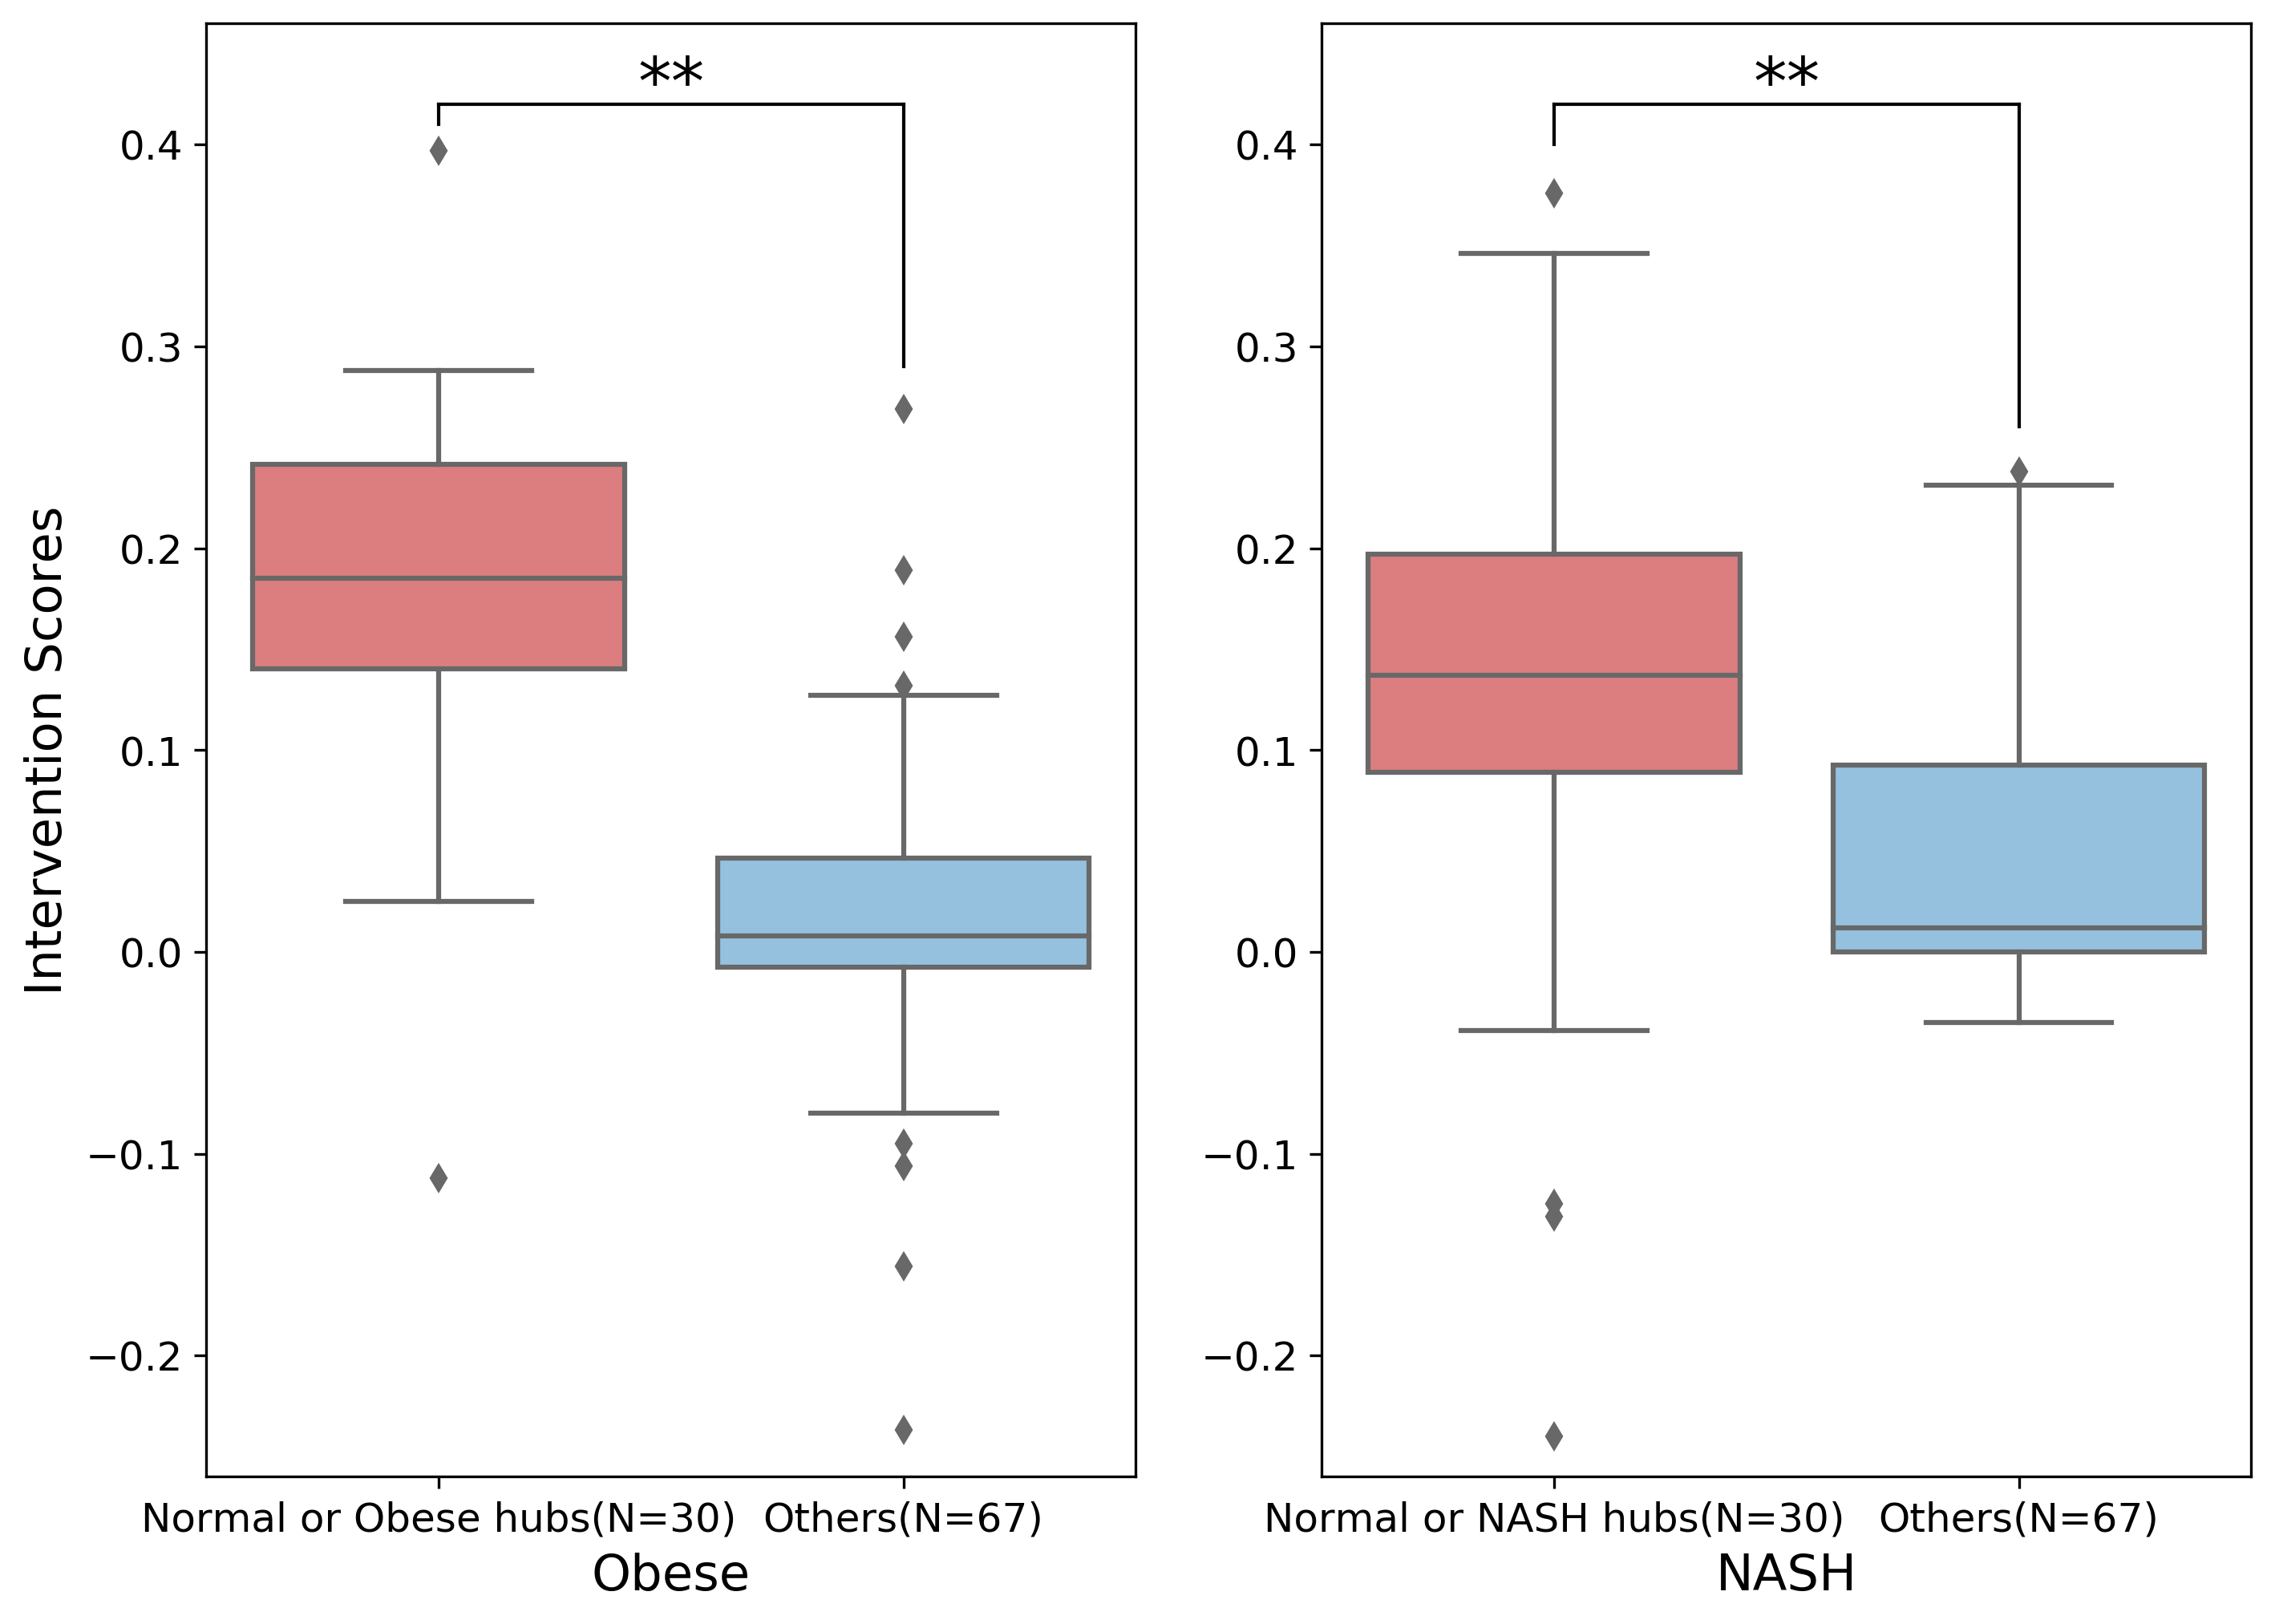

In [6]:
from scipy.stats import ranksums, ttest_ind, ks_2samp
import matplotlib.gridspec as gridspec
import matplotlib.lines as mlines
_ = plt.figure(figsize=(10, 8), dpi=300)
gs = gridspec.GridSpec(1, 2)
gs.update(left=0.1, right=0.95, wspace=0.2, hspace=0.05)

### Obese
ranksums(obese_hub_scores, obese_nohub_scores)
res = []
for i in obese_hub_scores:
    res.append(['Hub', i])
for i in obese_nohub_scores:
    res.append(['Others', i])
res = pd.DataFrame(res, columns=['Hub', 'Intervention Score'])
ax = plt.subplot(gs[0, 0])
p = sns.boxplot(x="Hub", y="Intervention Score", data=res, palette=['#ec6d71', '#89c3eb'], ax=ax)
_ = p.set_xticklabels(['Normal or Obese hubs(N='+str(len(obese_hub_scores))+')', 'Others(N='+str(len(obese_nohub_scores))+')'], fontsize=12)
_ = p.set_xlabel('Obese', fontsize=15)
_ = p.set_ylabel('Intervention Scores', fontsize=15)
_ = ax.add_line(mlines.Line2D([0, 1], [0.42, 0.42], lw=1., c='k'))
_ = ax.add_line(mlines.Line2D([0, 0], [0.41, 0.42], lw=1., c='k'))
_ = ax.add_line(mlines.Line2D([1, 1], [0.29, 0.42], lw=1., c='k'))
_ = ax.text(0.5, 0.42, '**', ha="center", fontsize=20)
_ = ax.set_ylim([-0.26, 0.46])
_ = plt.tick_params(labelsize=12) 

### NASH
ranksums(nash_hub_scores, nash_nohub_scores)
res = []
for i in nash_hub_scores:
    res.append(['Hub', i])
for i in nash_nohub_scores:
    res.append(['Others', i])
res = pd.DataFrame(res, columns=['Hub', 'Intervention Score'])
ax = plt.subplot(gs[0, 1])
p = sns.boxplot(x="Hub", y="Intervention Score", data=res, palette=['#ec6d71', '#89c3eb'], ax=ax)
_ = p.set_xticklabels(['Normal or NASH hubs(N='+str(len(nash_hub_scores))+')', 'Others(N='+str(len(nash_nohub_scores))+')'], fontsize=12)
#_ = ax.set_yticklabels(ax.get_yticklabels(),fontsize=12)
_ = p.set_xlabel('NASH', fontsize=15)
_ = p.set_ylabel('')
_ = ax.add_line(mlines.Line2D([0, 1], [0.42, 0.42], lw=1., c='k'))
_ = ax.add_line(mlines.Line2D([0, 0], [0.40, 0.42], lw=1., c='k'))
_ = ax.add_line(mlines.Line2D([1, 1], [0.26, 0.42], lw=1., c='k'))
_ = ax.text(0.5, 0.42, '**', ha="center", fontsize=20)
_ = ax.set_ylim([-0.26, 0.46])

_ = plt.tick_params(labelsize=12) 
_ = plt.show()